<a href="https://colab.research.google.com/github/naryman182000/Ai_project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf
from PIL import Image, ImageStat
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import svm
from sklearn.svm import SVC

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
path = "drive/MyDrive/Dataset"
data_sets= ["/content/drive/MyDrive/Dataset/0", "/content/drive/MyDrive/Dataset/1", "/content/drive/MyDrive/Dataset/2", "/content/drive/MyDrive/Dataset/3"
,"/content/drive/MyDrive/Dataset/4","/content/drive/MyDrive/Dataset/5","/content/drive/MyDrive/Dataset/6","/content/drive/MyDrive/Dataset/7","/content/drive/MyDrive/Dataset/8","/content/drive/MyDrive/Dataset/9"]

In [26]:
from PIL import Image, ImageStat

In [27]:
def normalize():
  images=[]
  classes=[]
  for ite in range(0,len(data_sets)):
    current_path=data_sets[ite]
    for ite2 in os.listdir(current_path):
      image=cv2.imread(os.path.join(current_path,ite2),cv2.COLOR_RGB2BGR)
      image = cv2.resize(image, (100, 100))
     # print(np.mean(image, axis=(0,1),dtype='float64'))             #divide the image
      average=np.mean(image, axis=(0,1),dtype='float64')  #calculate the average 
      #print(average)
      image=image-average                #subtract the average 
      image=image/255   
      #print(image.shape)
      classes.append(ite)
      images.append(image)
      print(image)  
      #plt.axis("off")
      #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      #plt.show()

  return images,classes
  

In [28]:
x, y=normalize()


Streaming output truncated to the last 5000 lines.
  [-0.23015569 -0.26580235 -0.30664118]
  [-0.23407725 -0.26972392 -0.31056275]]]
[[[-0.04025059 -0.07532824 -0.11202549]
  [-0.03632902 -0.07140667 -0.10810392]
  [-0.02456431 -0.05964196 -0.09633922]
  ...
  [-0.21279961 -0.22042627 -0.24535882]
  [-0.21672118 -0.22434784 -0.24928039]
  [-0.21672118 -0.22434784 -0.24928039]]

 [[-0.03632902 -0.07140667 -0.10810392]
  [-0.02848588 -0.06356353 -0.10026078]
  [-0.02064275 -0.05572039 -0.09241765]
  ...
  [-0.20495647 -0.21258314 -0.23751569]
  [-0.21279961 -0.22042627 -0.24535882]
  [-0.21672118 -0.22434784 -0.24928039]]

 [[-0.02848588 -0.06356353 -0.10026078]
  [-0.02064275 -0.05572039 -0.09241765]
  [-0.01279961 -0.04787725 -0.08457451]
  ...
  [-0.19319176 -0.20081843 -0.22575098]
  [-0.20495647 -0.21258314 -0.23751569]
  [-0.21279961 -0.22042627 -0.24535882]]

 ...

 [[-0.14221137 -0.17336745 -0.1983    ]
  [-0.13436824 -0.16552431 -0.19045686]
  [-0.1265251  -0.15768118 -0.1826137

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.8)

In [30]:
X_train=np.array(X_train)
y_train=np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1649, 100, 100, 3)
(1649,)


In [31]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


In [32]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 28224)            

In [33]:
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10) 

loss, accuracy = model.evaluate(X_train,y_train)
print("accuracy : " + str(accuracy ))
print("loss : " + str(loss))               

Epoch 1/5
52/52 [==============================] - 27s 501ms/step - loss: 1.2573 - accuracy: 0.5852
Epoch 2/5
52/52 [==============================] - 26s 501ms/step - loss: 0.5124 - accuracy: 0.8357
Epoch 3/5
52/52 [==============================] - 26s 500ms/step - loss: 0.2233 - accuracy: 0.9224
Epoch 4/5
52/52 [==============================] - 30s 573ms/step - loss: 0.1038 - accuracy: 0.9654
Epoch 5/5
52/52 [==============================] - 7s 135ms/step - loss: 0.0204 - accuracy: 0.9964
accuracy : 0.9963614344596863
loss : 0.020418617874383926


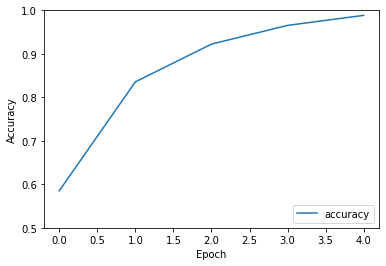

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [35]:
from sklearn import pipeline

In [36]:
print(X_train.shape)

(1649, 100, 100, 3)


In [37]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    return model.score(X_test, y_test )

In [38]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.model_selection import KFold

In [45]:
X = np.array( X_train)
y = np.array(y_train)
kf = KFold(n_splits=3)
for train_index, test_index in kf.split(X):
  X2_train, X2_test = X[train_index], X[test_index]
  y2_train, y2_test = y[train_index], y[test_index]
  history = model.fit(X2_train, y2_train, epochs=10) 
  loss, accuracy = model.evaluate(X2_train,y2_train)
  print("accuracy : " + str(accuracy ))
  print("loss : " + str(loss))
  
  

Epoch 1/5
35/35 [==============================] - 17s 495ms/step - loss: 5.0484e-04 - accuracy: 1.0000
Epoch 2/5
35/35 [==============================] - 17s 497ms/step - loss: 2.9449e-04 - accuracy: 1.0000
Epoch 3/5
35/35 [==============================] - 17s 495ms/step - loss: 2.0130e-04 - accuracy: 1.0000
Epoch 4/5
35/35 [==============================] - 17s 495ms/step - loss: 1.6271e-04 - accuracy: 1.0000
Epoch 5/5
35/35 [==============================] - 5s 137ms/step - loss: 1.2246e-04 - accuracy: 1.0000
accuracy : 1.0
loss : 0.0001224590523634106
Epoch 1/5
35/35 [==============================] - 18s 500ms/step - loss: 0.0666 - accuracy: 0.9809
Epoch 2/5
35/35 [==============================] - 21s 605ms/step - loss: 0.0369 - accuracy: 0.9864
Epoch 3/5
35/35 [==============================] - 17s 499ms/step - loss: 0.0203 - accuracy: 0.9927
Epoch 4/5
35/35 [==============================] - 18s 501ms/step - loss: 0.0106 - accuracy: 0.9945
Epoch 5/5
35/35 [====================

In [46]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    return model.score(X_test, y_test )

In [47]:
def sec_normalize():
  images=[]
  classes=[]
  for ite in range(0,len(data_sets)):
    current_path=data_sets[ite]
    for ite2 in os.listdir(current_path):
      image=cv2.imread(os.path.join(current_path,ite2),cv2.COLOR_RGB2BGR)
      image = cv2.resize(image, (100, 100))
     # print(np.mean(image, axis=(0,1),dtype='float64'))             #divide the image
      average=np.mean(image, axis=(0,1),dtype='float64')  #calculate the average 
      #print(average)
      image=image-average                #subtract the average 
      image=image/255   
      #print(image.shape)
      classes.append(ite)
      image=np.array(image)
      images.append(image.flatten())
     # print(image.flatten())  
      #plt.axis("off")
      #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      #plt.show()

  return images,classes

In [48]:
x2,y2=sec_normalize()

In [49]:
clf = make_pipeline(StandardScaler(), SVC(C=1,kernel="poly",gamma="auto"))

In [50]:
clf = svm.SVC()

In [51]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=.8)

In [52]:
X2_train=np.array(X2_train)
y2_train=np.array(y2_train)
print(X_train.shape)
print(y_train.shape)

(1649, 100, 100, 3)
(1649,)


In [ ]:
clf.fit(X2_train,y2_train)

In [ ]:
from sklearn import metrics

In [ ]:
clf.score(X2_test, y2_test)

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(X2_train,y2_train)
y_pred= model.predict(X2_test)

In [ ]:
print(metrics.accuracy_score(y2_test, y_pred))